# An√°lisis del perfil crediticio de clientes bancarios 


### Carga de Librer√≠as

In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importar SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

### 1. Carga del CSV y Presentaci√≥n Inicial

In [245]:
#Cargar datos del CSV (variable datos)
datos = pd.read_csv('loan_data.csv')

#Mostrar tama√±o del datosset
print(datos.shape)

#Mostrar tipos de columnas
datos.info()

#Mostrar describe
print(datos.describe())

#Mostrar primeras filas de cada columna
print(datos.head())

#Guardamos variables target (Valor objetivo primer y segundo modelo)
target = 'loan_status'
target_regresion = 'risk_score'

(45000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45000 non-null  float64
 1   gender            45000 non-null  object 
 2   education         45000 non-null  object 
 3   income            45000 non-null  float64
 4   yrs_exp           45000 non-null  int64  
 5   ownership         45000 non-null  object 
 6   amount            45000 non-null  float64
 7   purpose           44962 non-null  object 
 8   int_rate          45000 non-null  float64
 9   percent_income    45000 non-null  float64
 10  cred_hist_length  45000 non-null  float64
 11  risk_score        45000 non-null  int64  
 12  previous_loans    45000 non-null  object 
 13  loan_status       45000 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 4.8+ MB
                age        income       yrs_exp        amount    

Tenemos 45000 registros alojados en 14 columnas

Adem√°s hemos detectado que hay diferentes errores como:

Edad (age) max , que est√° en **144 a√±os**

A√±os de exp (yrs_exp) max que est√°n en **125 a√±os**

El risk_score min **-637.00**

El risk_score max **77000** que desvirtua los datos

Procederemos a limpiarlos:

### 2. Limpieza de Datos
- 2.1 Gesti√≥n de Valores Nulos
- 2.2 Detecci√≥n de Valores Err√≥neos

In [246]:
#Detecci√≥n de valores nulos
print(datos.isnull().sum())

#Detecci√≥n de valores err√≥neos
#Mostramos los valores unicos de cada columnas categoricas
print("Valores unicos de cada columna categoricas")
for column in datos.select_dtypes(include='object').columns:
    print(column, datos[column].unique())
    


age                  0
gender               0
education            0
income               0
yrs_exp              0
ownership            0
amount               0
purpose             38
int_rate             0
percent_income       0
cred_hist_length     0
risk_score           0
previous_loans       0
loan_status          0
dtype: int64
Valores unicos de cada columna categoricas
gender ['female' 'male' 'femal']
education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'OWN ']
purpose ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION' nan]
previous_loans ['No' 'Yes']


Como vemos, tenemos valores nulos en el **purpose** , adem√°s tenemos el **gender** mal con un 'femal' y dos OWN en **ownership**

Procederemos a limpiarlos

### Aplicamos t√©cnicas de limpieza de datos

In [247]:
#Eliminar filar con campos nulos
data_clean = datos.dropna()


#Repetimos la detecci√≥n de valores nulos
#print(data_clean.isnull().sum())

#Corroboramos que se hayan eliminado los valores nulos
null_values = data_clean.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna")
print(null_values)

#Quitamos registros de femal y los pasamos a female
data_clean = data_clean.replace({'femal': 'female'})
#Quitamos un OWN
data_clean = data_clean.replace({'OWN ': 'OWN'})

#Volvemos a comprobar los valores √∫nicos
for column in data_clean.select_dtypes(include='object').columns:
    print(column, data_clean[column].unique())

Cantidad de valores nulos por columna
age                 0
gender              0
education           0
income              0
yrs_exp             0
ownership           0
amount              0
purpose             0
int_rate            0
percent_income      0
cred_hist_length    0
risk_score          0
previous_loans      0
loan_status         0
dtype: int64
gender ['female' 'male']
education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
purpose ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loans ['No' 'Yes']


Como vemos, ahora s√≠ est√° limpio

### Detecci√≥n de Valores At√≠picos

Ahora comprobaremos las columnas con valores num√©ricos para detectar posibles valores at√≠picos. Usaremos un gr√°fico de cajas Box Plot para representarlos

Index(['age', 'income', 'yrs_exp', 'amount', 'int_rate', 'percent_income',
       'cred_hist_length', 'risk_score', 'loan_status'],
      dtype='object')


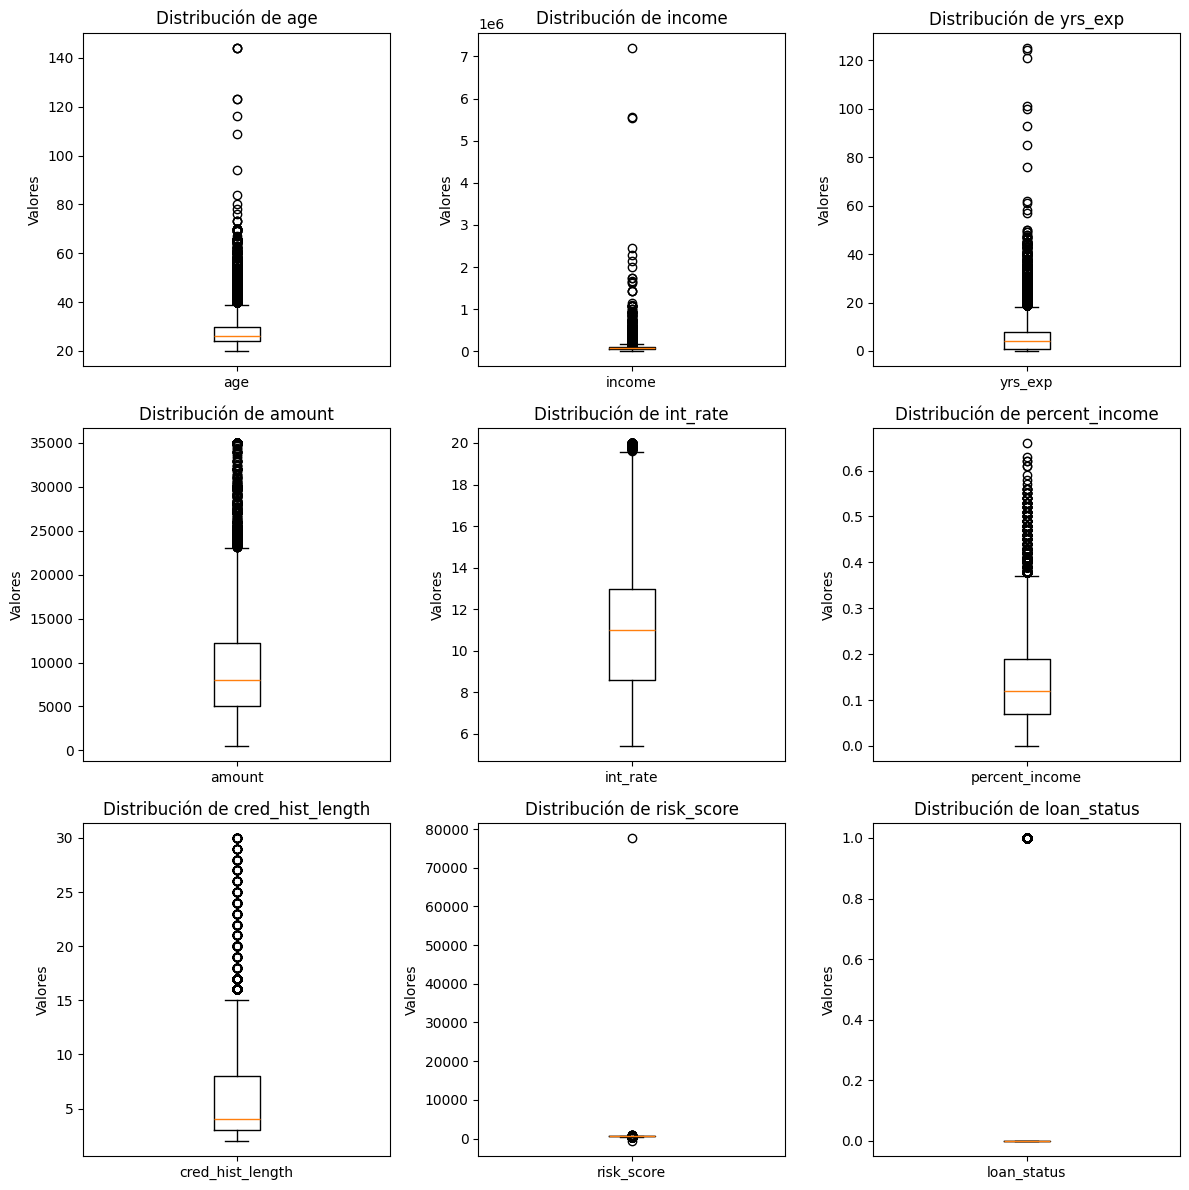

In [248]:
#Solo las num√©ricas (box plot solo puede representar columnas num√©ricas)
categorias = data_clean.select_dtypes(include='number').columns
print(categorias)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12)) #Primer 12 largo, segundo ancho

axes = axes.flatten()
for i, var in enumerate(categorias):
    axes[i].boxplot(datos[var], tick_labels=[var])
    axes[i].set_title(f'Distribuci√≥n de {var}')
    axes[i].set_ylabel('Valores')
    
for j, in range(len(categorias), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

Si observamos podemos ver los siguientes valores at√≠picos:

- age (edad) -> Valores at√≠picos en 140 que no tienen sentido

- yrs_exp (a√±os exp) -> Valores at√≠picos en 120 que no tienen sentido

- risk_score (riesgo) -> Un valor at√≠pico en 80000 que se aleja mucho de los dem√°s


Teniendo esto vamos a ajustar los valores de dichas columnas

En el caso de **yrs_exp** la ajustaremos a valores entre 0 y 45 (en Espa√±a se cotizan 38 a√±os para el 100 % de la jubilaci√≥n pero a√±adiremos algunos a√±os m√°s) El resto no lo queremos

En **age** ajustaremos los valores entre 0 y 120 a√±os ya que m√°s no es real

Y el **risk_score** eliminaremos los valores at√≠picos que se alejan tanto para no alterarnos los resultados posteriores

In [249]:
data_clean['risk_score'].max()

np.int64(77710)

In [254]:
#Calculamos porcentaje de valores at√≠picos en las columnas age y yrs_exp
total_rows = data_clean.shape[0]

#IDENTIFICACI√ìN DE OUTLIERS EN EL RISK_SCORE
#Obtenemos valores at√≠picos del risk_score
media_risk_score = data_clean['risk_score'].mean()
#Calculamos la desviaci√≥n estandar
std_risk_score = data_clean['risk_score'].std()
#Aqu√≠ almacenaremos los outliers (valores at√≠picos)
outliers = []

#C√°lculo del valor z (z-score mide cuantas desviaciones est√°n alejadas de la media)
for element in data_clean['risk_score'].values:
    z = abs(element - media_risk_score) / std_risk_score
    if z > 2:
        outliers.append(element)
        
#C√°lculo del porcentaje de valores at√≠picos
#Calculamos el porcentaje de valores atipicos en las columnas age, yrs_exp y risk_score
total_outliers = (data_clean[data_clean['age'] > 100].shape[0] + data_clean[data_clean['yrs_exp'] > 51].shape[0] + len(outliers)) * 100 / total_rows
print("El total de valores atipicos es: ", round(total_outliers,4), "%")
print("Cantidad de datos antes de la limpieza: ", data_clean.shape)

#Eliminamos valores at√≠picos de age y yrs_exp
data_clean = data_clean[data_clean['age'] <= 120]
data_clean = data_clean[data_clean['yrs_exp'] <= 45]

#Eliminamos valores at√≠picos de risk_score con z-score (la ~ invierte los valores)
data_clean = data_clean[~data_clean['risk_score'].isin(outliers)] #filtra excluyendo los outliers

#Imprimimos resultados para comprobar que ya no est√©n los valores at√≠picos
print("El total de valores atipicos es: ", round(total_outliers,4), "%")
print("Cantidad de datos despu√©s de la limpieza: ", data_clean.shape)



#Mostrar describe
print(data_clean.describe())



El total de valores atipicos es:  2.1417 %
Cantidad de datos antes de la limpieza:  (40249, 14)
El total de valores atipicos es:  2.1417 %
Cantidad de datos despu√©s de la limpieza:  (39387, 14)
                age        income       yrs_exp        amount      int_rate  \
count  39387.000000  3.938700e+04  39387.000000  39387.000000  39387.000000   
mean      27.742834  7.998931e+04      5.388098   9586.063346     11.008747   
std        5.769019  6.268681e+04      5.781116   6318.987776      2.984103   
min       20.000000  8.000000e+03      0.000000    500.000000      5.420000   
25%       24.000000  4.728850e+04      1.000000   5000.000000      8.590000   
50%       26.000000  6.709600e+04      4.000000   8000.000000     11.010000   
75%       30.000000  9.576550e+04      8.000000  12250.000000     12.995000   
max       69.000000  2.448661e+06     45.000000  35000.000000     20.000000   

       percent_income  cred_hist_length    risk_score   loan_status  
count    39387.000000  

Podemos observar que los valores at√≠picos se han solucionado por lo que pasaremos al siguiente paso

#### Para Recordar
Antes de continuar es buena pr√°ctica verificar que el dataset est√© balanceado

In [255]:
class_types = data_clean[target].value_counts()
class_proportion = data_clean[target].value_counts(normalize=True) * 100

print("Tipos de clases")
print(class_types)
print("Proporcion de clases")
print(round(class_proportion,2))

Tipos de clases
loan_status
0    30674
1     8713
Name: count, dtype: int64
Proporcion de clases
loan_status
0    77.88
1    22.12
Name: proportion, dtype: float64


El dataset muestra que est√° desbalanceado ya que para estar balanceado los datos deber√≠an estar en torno a un 40-60 % o 50-50 %

En pasos posteriores aplicaremos alguna t√©cnica para solucionarlo


### 3- Ingenier√≠a de Caracter√≠sticas

En este proceso vamos a codificar las variables categ√≥ricas (no num√©ricas) para darles un valor num√©rico

(ejemplo: si es g√©nero hombre y mujer pasarlo a 0 y 1)

#### Codificaci√≥n de variables categ√≥ricas
Empezaremos mostrando las columnas para saber las que tenemos que codificar

In [259]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39387 entries, 2 to 44999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               39387 non-null  float64
 1   gender            39387 non-null  object 
 2   education         39387 non-null  object 
 3   income            39387 non-null  float64
 4   yrs_exp           39387 non-null  int64  
 5   ownership         39387 non-null  object 
 6   amount            39387 non-null  float64
 7   purpose           39387 non-null  object 
 8   int_rate          39387 non-null  float64
 9   percent_income    39387 non-null  float64
 10  cred_hist_length  39387 non-null  float64
 11  risk_score        39387 non-null  int64  
 12  previous_loans    39387 non-null  object 
 13  loan_status       39387 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 4.5+ MB


In [260]:
#USAMOS MAP PARA LAS COLUMNAS BINARIAS
#USAMOS 
#Aplicamos int a la columna age para garantizar que sea n√∫merica
data_clean['age'] = data_clean['age'].astype(int)

#Convertimos todas las columnas object a category
gender_map = {'male': 0, 'female': 1} #A√±adimos valores del 0 y 1
data_clean['gender_encoded'] = data_clean['gender'].map(gender_map)
data_clean.drop(['gender'], axis=1)

#A√±adimos a education sus 4 valores
education_map = {'High Schoool': 0, 'Associte': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
data_clean['education_encoded'] = data_clean['education'].map(education_map)

#Aplicamos int para garantizar que sea num√©rica
data_clean['education_encoded'] = data_clean['education_encoded'].fillna(0) #Quita NaN
data_clean['education_encoded'] = data_clean['education_encoded'].astype(int)
data_clean.drop(['education'], axis=1) #1 quiere decir que elimina una columna, no fila

data_ownership = pd.get_dummies(data_clean['ownership'], prefix='ownership', dtype=int, drop_first=True)
data_clean = pd.concat([data_clean, data_ownership], axis=1)

data_purpose = pd.get_dummies(data_clean['purpose'], prefix='purpose', dtype=int, drop_first=True)
data_clean = pd.concat([data_clean, data_purpose], axis=1)

data_previous_loans = {'No': 0, 'Yes': 1}
data_clean['previous_loans_encoded'] = data_clean['previous_loans'].map(data_previous_loans)
data_clean['previous_loans_encoded'] = data_clean['previous_loans_encoded'].astype(int)

data_encoded = data_clean.drop(['gender','education','ownership', 'purpose', 'previous_loans'], axis=1)

data_encoded.info()
data_encoded.head()




<class 'pandas.core.frame.DataFrame'>
Index: 39387 entries, 2 to 44999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      39387 non-null  int64  
 1   income                   39387 non-null  float64
 2   yrs_exp                  39387 non-null  int64  
 3   amount                   39387 non-null  float64
 4   int_rate                 39387 non-null  float64
 5   percent_income           39387 non-null  float64
 6   cred_hist_length         39387 non-null  float64
 7   risk_score               39387 non-null  int64  
 8   loan_status              39387 non-null  int64  
 9   gender_encoded           39387 non-null  int64  
 10  education_encoded        39387 non-null  int64  
 11  ownership_OTHER          39387 non-null  int64  
 12  ownership_OWN            39387 non-null  int64  
 13  ownership_RENT           39387 non-null  int64  
 14  purpose_EDUCATION        39

age   income  yrs_exp   amount  int_rate  percent_income  cred_hist_length  \
2   25  12438.0        3   5500.0     12.87            0.44               3.0   
3   23  79753.0        0  35000.0     15.23            0.44               2.0   
4   24  66135.0        1  35000.0     14.27            0.53               4.0   
6   26  93471.0        1  35000.0     12.42            0.37               3.0   
7   24  95550.0        5  35000.0     11.11            0.37               4.0   

   risk_score  loan_status  gender_encoded  education_encoded  \
2         635            1               1                  0   
3         675            1               1                  2   
4         586            1               0                  3   
6         701            1               1                  2   
7         585            1               1                  0   

   ownership_OTHER  ownership_OWN  ownership_RENT  purpose_EDUCATION  \
2                0              0               0                  0   
3                0              0               1                  0   
4                0              0               1                  0   
6                0              0               1                  1   
7                0              0               1                  0   

   purpose_HOMEIMPROVEMENT  purpose_MEDICAL  purpose_PERSONAL  \
2                        0                1                 0   
3                        0                1                 0   
4                        0                1                 0   
6                        0                0                 0   
7                        0                1                 0   

   purpose_VENTURE  previous_loans_encoded  
2                0                       0  
3                0                       0  
4                0                       0  
6                0                       0  
7                0                       0

#### Selecci√≥n de Caracter√≠sticas

Vamos a seleccionar las columnas m√°s relevantes con el valor target

Para saber cuales son usaremos un mapa de calor (Mapa de calor de correlaci√≥n)

Este mapa nos mostrar√° de forma gr√°fica las correlaciones entre las columnas y seg√∫n la correlaci√≥n sea m√°s cercana al 1 mejor tanto positiva como en negativo

- Valores cercanos a -1 o a 1 indican una fuerte correlaci√≥n con la **target**

- Valores cercanos a 0 indican poca o ninguna correlaci√≥n con la **target**

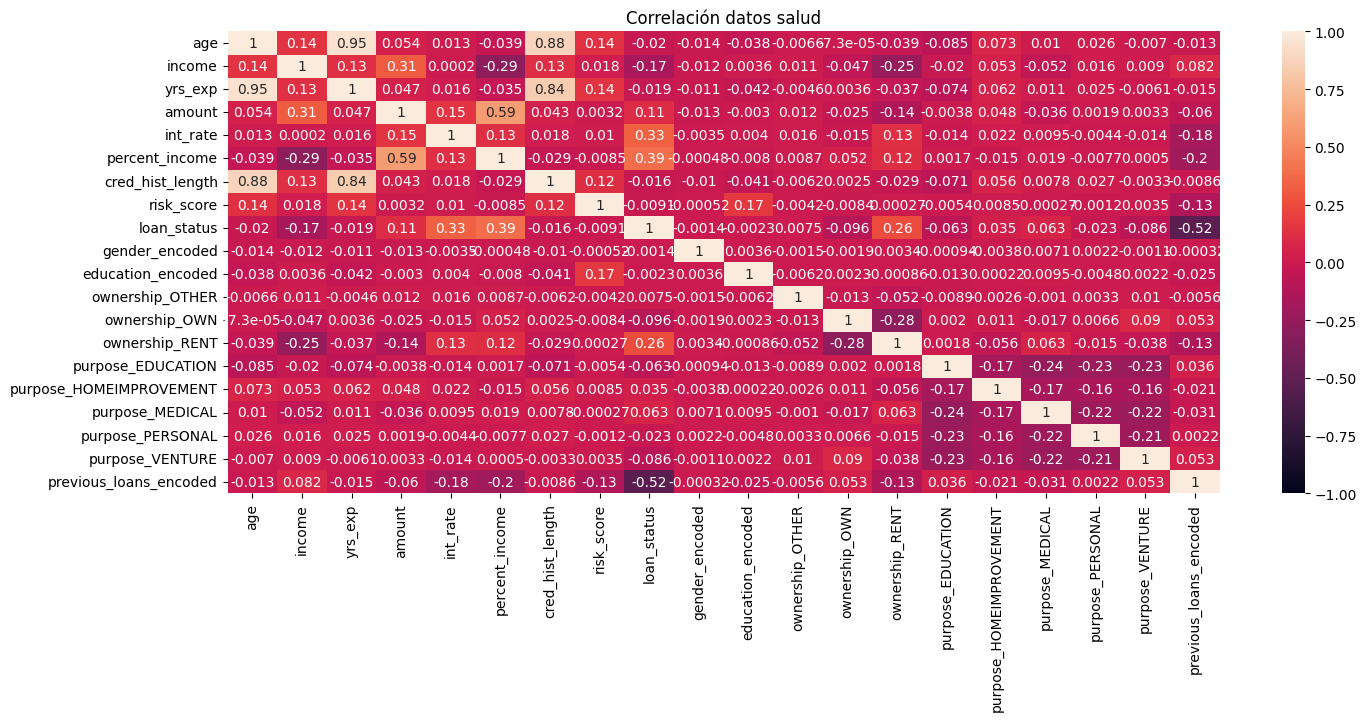

In [262]:
plt.figure(figsize=(16, 6)) 
heatmap = sns.heatmap(data_encoded.corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Correlaci√≥n datos salud') 
plt.show()



Como este desbalanceo podr√≠a influir en el rendimiento del modelo (m√°s en clasificaci√≥n) vamos a aplicar la t√©cnica SMOTE. Tambi√©n podr√≠amos hacer sobremuestreo (oversampling) con la clase minoritaria o submuestreo (undersampling) con la clase mayoritaria

#### üìì T√©cnica SMOTE para Desbalanceo 



In [ ]:
#Separar caracter√≠sticas (X) de variable objetivo (y)
X = data_clean.drop('loan_status', axis=1) #Reemplaza loan_status con tu columna objetivo
y = data_clean['loan_status']

#Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Aplicar SMOTE en los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Verificar que se ha balanceado
print("Distribuci√≥n original: ", Counter(y_train))
print("Distribuci√≥n con SMOTE: ", Counter(y_train_smote))